In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns
import json

In [2]:
from cdlib import algorithms

In [3]:
path_subgraph = "../DataSet StackOverflow/Graph_data/"

In [4]:
def plot_centralities(first, name_f, second, name_s, third, name_t, n):

    lista = [(k, v) for k, v in first.items()]
    lista.sort(key=lambda x: x[1], reverse = True)
    tops = lista[:n]
    first_ = []
    second_ = []
    third_ = []
    for i in tops:
        first_.append(first[i[0]])
        second_.append(second[i[0]])
        third_.append(third[i[0]])
        
    tops = [i for i,j in tops]
    tops = tops[::-1]
    first_ = first_[::-1]
    second_ = second_[::-1]
    third_ = third_[::-1]
    
    fig = plt.figure(figsize = (25,8), dpi = 300)

    fontsize = 17
    plt.rcParams.update({'font.size': fontsize})
    ax = fig.add_subplot(151)
    plt.barh(tops,first_, color = "#31A894")
    plt.grid(axis = 'both', alpha = .3)
    plt.xlabel(name_f)

    ax2 = fig.add_subplot(152)
    plt.barh(tops,second_, color = "#315FA8")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax2.get_yticklabels(), visible = False)
    plt.xlabel(name_s)

    ax3 = fig.add_subplot(153)
    plt.barh(tops,third_, color = "#5D2FA5")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax3.get_yticklabels(), visible = False)
    plt.xlabel(name_t)
    plt.show()

In [5]:
path_graph = "../DataSet StackOverflow/Graph_data/"

In [6]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [6]:
ba_G = nx.read_graphml(path_graph+"BA_Network.graphml")
er_G = nx.read_graphml(path_graph+"ER_Network.graphml")
ws_G = nx.read_graphml(path_graph+"WS_Network.graphml")
cm_G = nx.read_graphml(path_graph+"CM_Network.graphml")

In [7]:
models = {
    "Real Network": G,
    "Barabasi Albert": ba_G,
    "Erdos Renyi": er_G,
    "Watts Strogatz": ws_G,
    "Configuration Model": cm_G
}

# 1 - Degree Centrality

In [10]:
degree_centrality = nx.degree_centrality(G)

In [8]:
new_centrality_nodes = [k for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)]
new_df = pd.DataFrame({"Id": new_centrality_nodes})
new_df.to_csv("../DataSet StackOverflow/centrality_degree_nodes.csv", index=False)

# 2 - Connectivity Based Centrality

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='Count',  max_iter=1000)

# 3 - PageRank centrality

In [21]:
pagerank_centrality = nx.pagerank(G, weight='Count', max_iter=1000)

In [16]:
nx.pagerank??

# 4 - Geometric Centrality

In [52]:
closeness_centrality = nx.closeness_centrality(G)

In [54]:
harmonic_centrality = nx.harmonic_centrality(G)

In [8]:
betweenness_centrality = nx.betweenness_centrality(G, weight='Count')

Plot

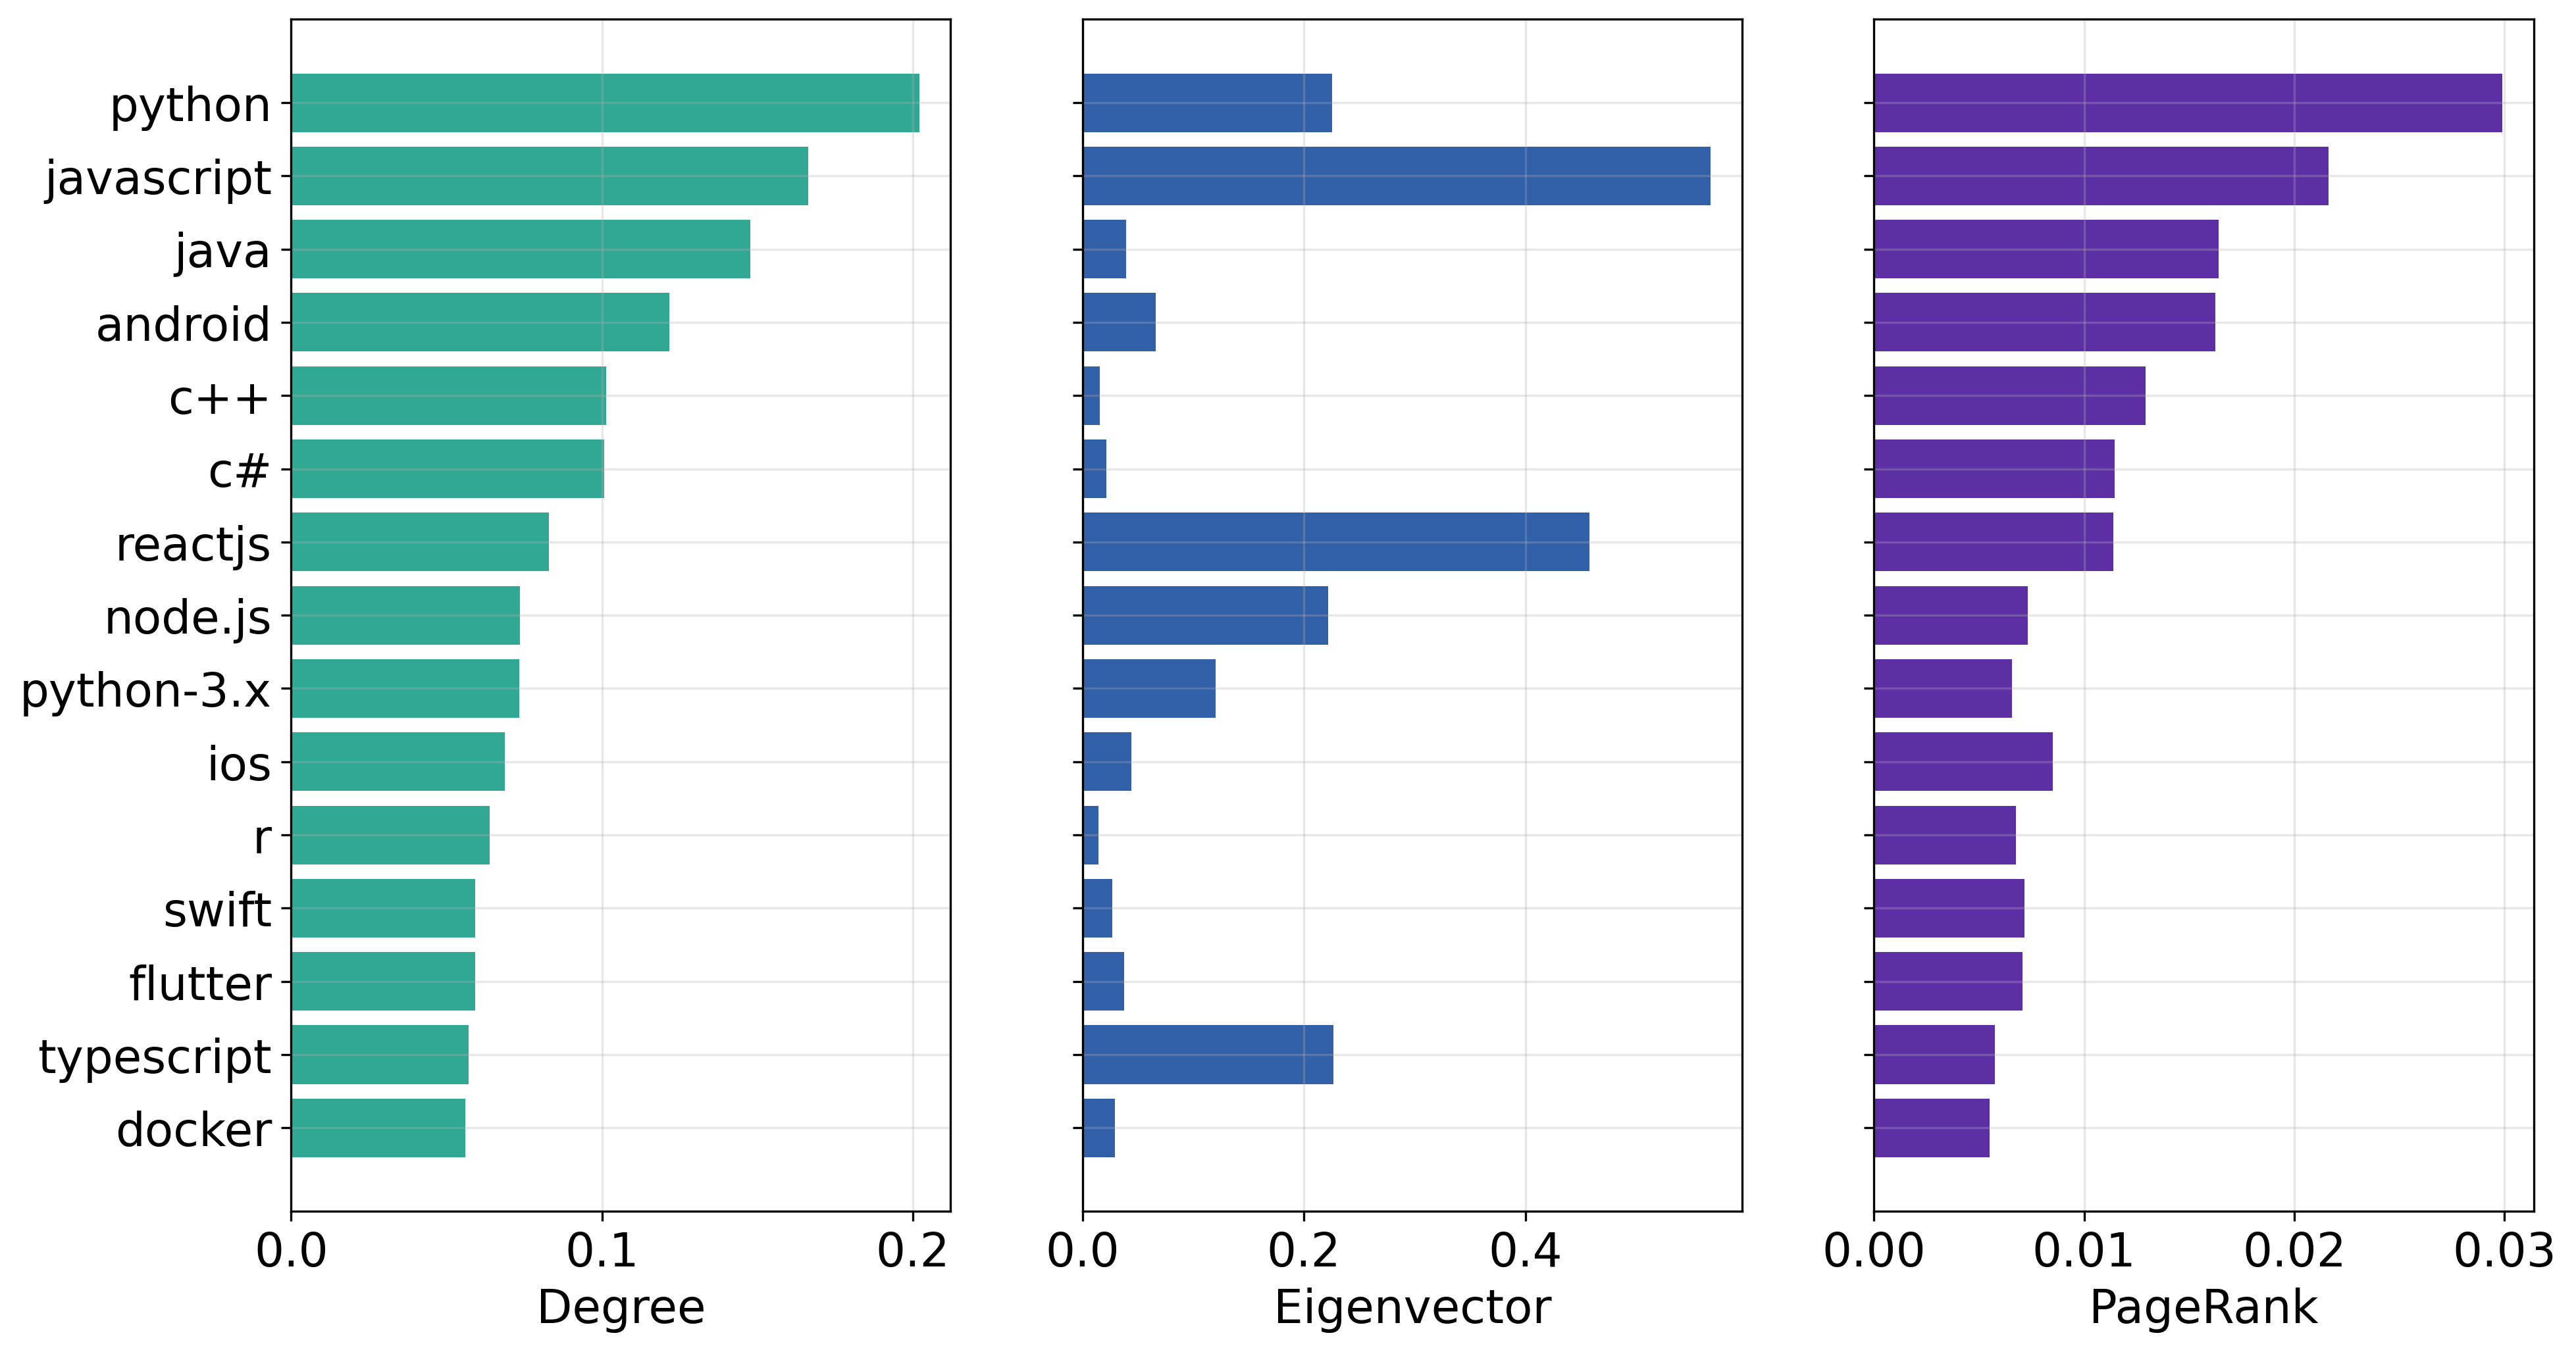

In [22]:
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

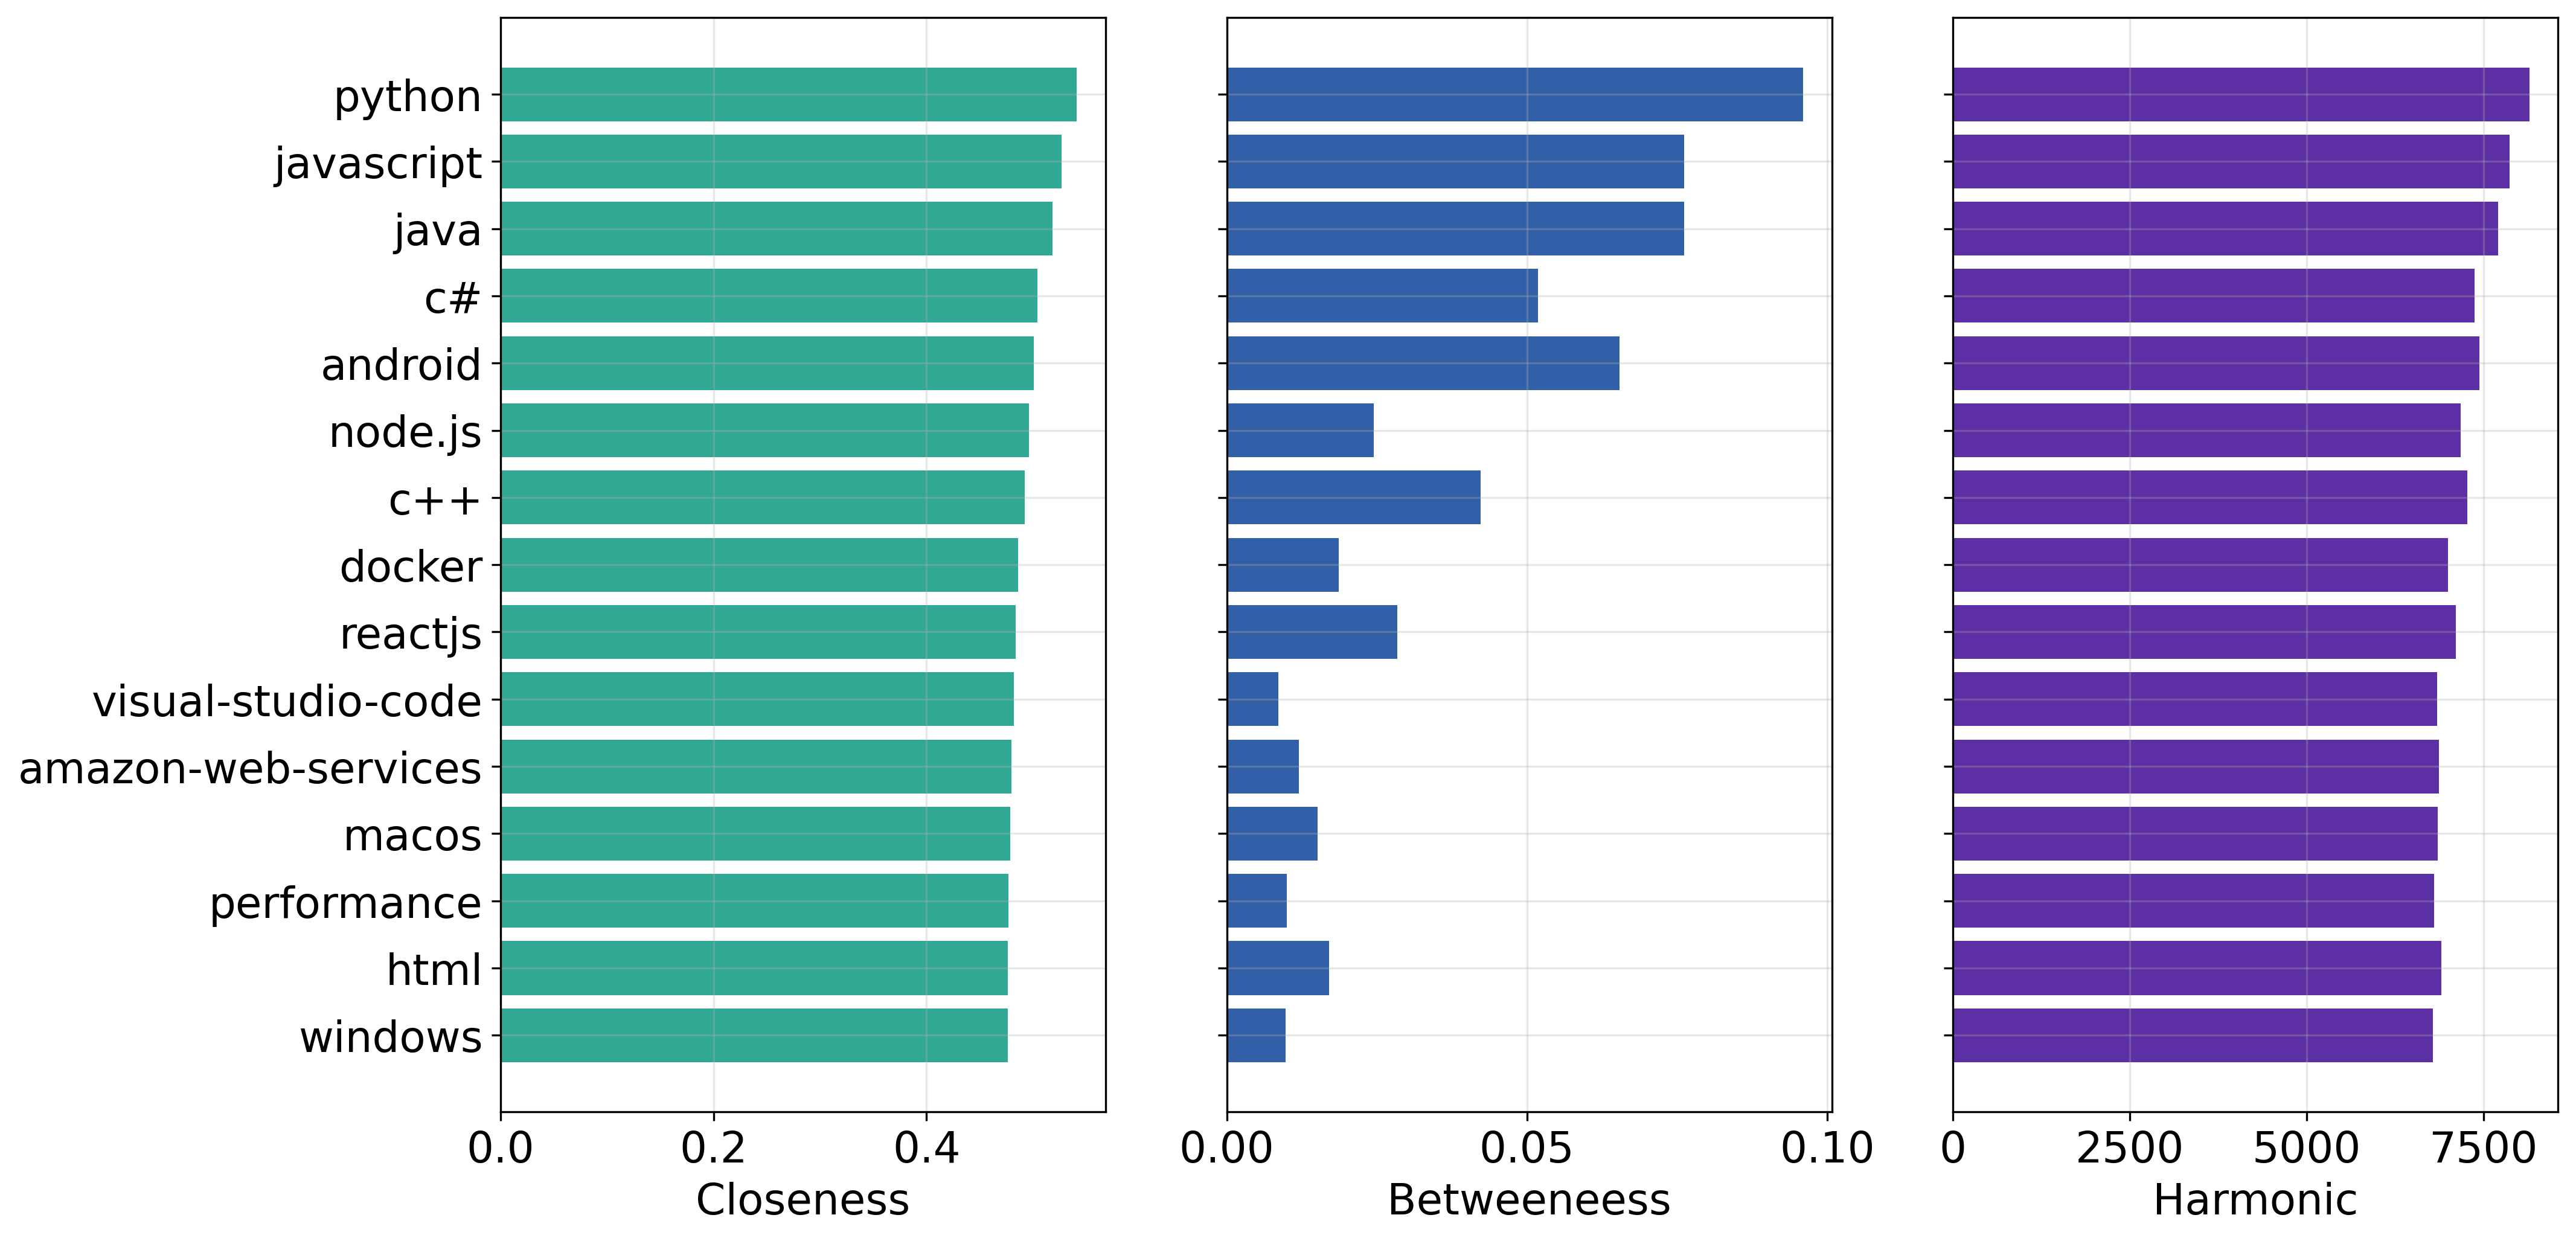

In [119]:
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

In [137]:
lista = [(k, v) for k, v in degree_centrality.items()]
lista.sort(key=lambda x: x[1], reverse = True)
tops = lista[:20]
tops = [i for i,j in tops]
H = G.subgraph(tops)
nx.write_gexf(H, path_subgraph+"centrality_subgraph.gexf")

### Storing central nodes

In [9]:
betweenness_centrality

{'reactjs': 0.028427602733078542,
 'webpack': 0.004705586549520158,
 'sass': 0.0009388697384557724,
 'create-react-app': 0.0004043359356526345,
 'node-sass': 2.5303928988603686e-05,
 'ios': 0.027140379995563974,
 'xcode': 0.009415189058956245,
 'git': 0.010098591351687178,
 'node.js': 0.024488997139734174,
 'npm': 0.005844230745768931,
 'firebase': 0.006489337265446278,
 'google-cloud-firestore': 0.0013487201153528367,
 'javascript': 0.07618591658721019,
 'redux': 0.00104504563812338,
 'visual-studio-code': 0.008606655188010159,
 'yarnpkg': 0.00031377538424797775,
 'angular': 0.020176619900377987,
 'eslint': 0.0006944368404021801,
 'google-chrome': 0.00710076599546576,
 'android': 0.06541166721844731,
 'android-studio': 0.008822829262377891,
 'jenkins': 0.0018919269655022417,
 'string': 0.0035704022387647123,
 'php': 0.024336879201400322,
 'laravel': 0.0059617346485119635,
 'python': 0.09597302762812715,
 'intellij-idea': 0.002493640922488545,
 'c++': 0.04226078486070779,
 'r': 0.03010

In [16]:
new_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)}
new_centrality_nodes = [k for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)]

# 5 - Assortativity

Weighted graph

In [13]:
d_weighted = nx.degree_assortativity_coefficient(G, weight = "Count")

In [131]:
d_weighted

-0.12043939793828223

Text(0, 0.5, 'KNN(k)')

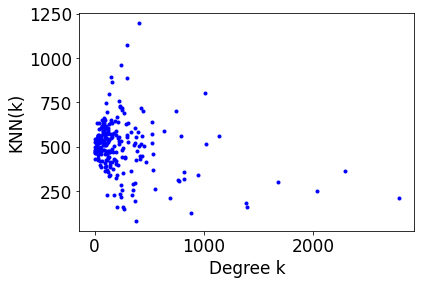

In [130]:
# Calcolo avg nearest neigh
## Compute the average degree connectivity of graph.
"""
The average degree connectivity is the average nearest neighbor degree of
    nodes with degree k. For weighted graphs, an analogous measure can
    be computed using the weighted average neighbors degree defined in
    [1]_, for a node `i`, as
"""
avg=nx.k_nearest_neighbors(G, weight = "Count")
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('KNN(k)')

Unweighted graph

In [22]:
d=nx.degree_assortativity_coefficient(G)

In [23]:
d

-0.15650324142756708

Text(0, 0.5, 'k_nn(k)')

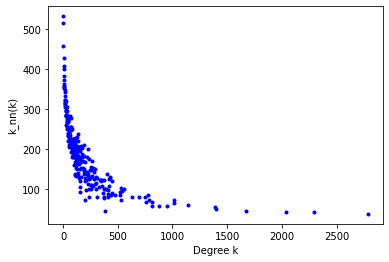

In [24]:
# Calcolo avg nearest neigh
avg=nx.k_nearest_neighbors(G)
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('KNN(k)')